In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

In [2]:
lam = 0.01
gamma_0 = 0.5
l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)

def Expr(t):
    expression = ((-l**2 + lam**2) * np.sinh(l*t/2)) / (l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))
    return expression

def s(t):
    return np.imag(Expr(t))

def gam(t):
    return np.real(Expr(t))


time = np.linspace(0.1, 200, 2000000)  # Adjust time range as needed
gam_vals = np.array([gam(t) for t in time])

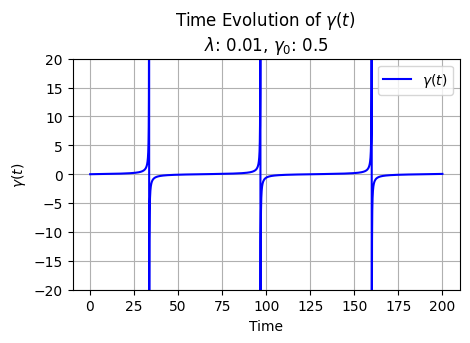

In [3]:
# Plotting
plt.figure(figsize=(5, 3))
plt.plot(time, gam_vals, label=r'$\gamma(t)$', color='b')
plt.xlabel('Time')
plt.ylabel(r'$\gamma(t)$')
plt.title(f"Time Evolution of $\\gamma(t)$ \n$\\lambda$: {lam}, $\\gamma_0$: {gamma_0}", fontsize=12)
plt.legend()
plt.ylim((-20,20))
plt.grid(True)
plt.show()

In [4]:
# Define Hamiltonian
H_zero = qt.Qobj(np.zeros((2, 2)))  # Zero operator for the Hamiltonian

psi0 = (qt.basis(2, 0) + qt.basis(2, 1)).unit() 

e_ops = [qt.sigmax(), qt.sigmay(), qt.sigmaz()]

liou = qt.QobjEvo([
    qt.liouvillian(H_zero),
    [qt.lindblad_dissipator(qt.sigmap()), gam_vals]
], tlist=time)

options = {'normalize_output': False, 'method': 'lsoda'}
me_result = qt.mesolve(liou, psi0, time, e_ops=e_ops, options=options)

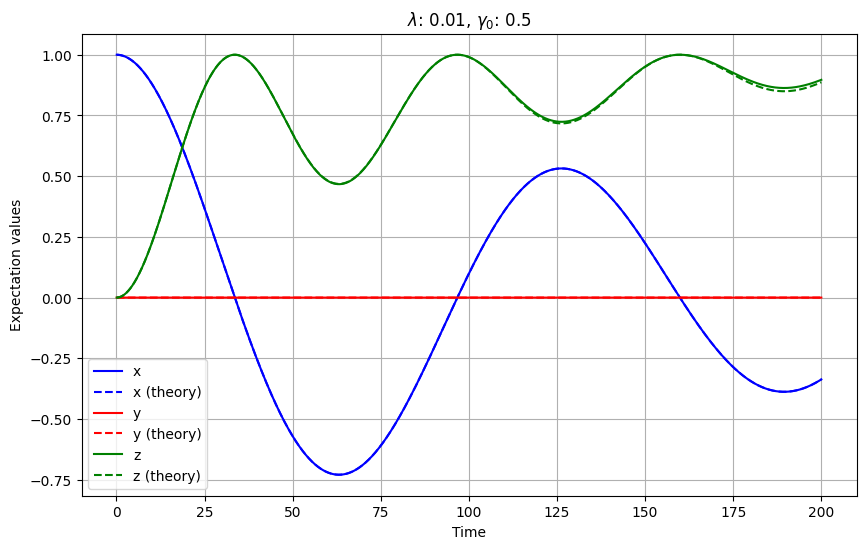

In [5]:
def G(t):
    return np.exp(-lam * t / 2) * (
        np.cosh(l * t / 2) + (lam / l) * np.sinh(l * t / 2)
    )
x0 = qt.expect(qt.sigmax(), psi0)
y0 = qt.expect(qt.sigmay(), psi0)
z0 = qt.expect(qt.sigmaz(), psi0)

# Prepare for plotting
plt.figure(figsize=(10, 6))
plt.plot(time, me_result.expect[0], 'b', label='x')
plt.plot(time, np.real((x0 + 1j * y0) * G(time)), 'b--', label='x (theory)')

plt.plot(time, me_result.expect[1], 'r', label='y')
plt.plot(time, -2 * np.imag((x0 + 1j * y0) * G(time)), 'r--', label='y (theory)')

plt.plot(time, me_result.expect[2], 'g', label='z')
plt.plot(time, 1 - (1 - z0) * np.abs(G(time))**2, 'g--', label='z (theory)')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.title(f"$\\lambda$: {lam}, $\\gamma_0$: {gamma_0}", fontsize=12)

plt.legend()
plt.grid()
plt.show()

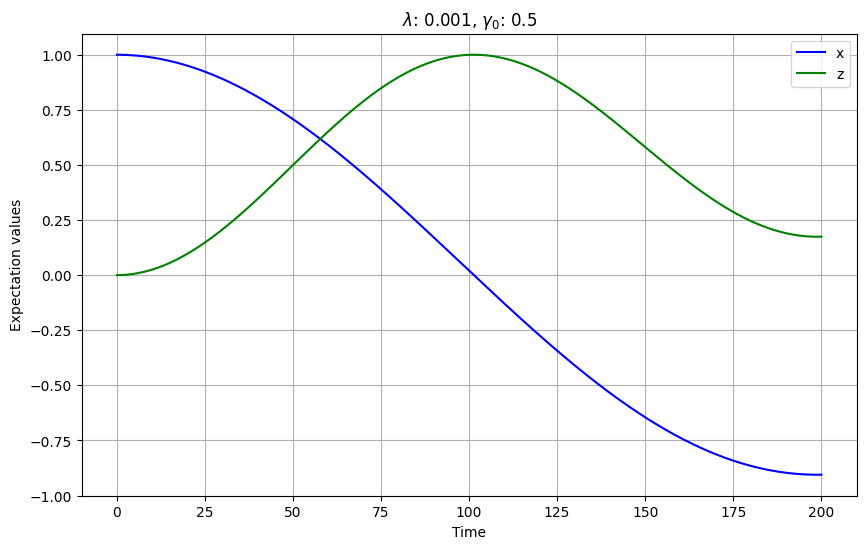

In [ ]:
def G(t):
    return np.exp(-lam * t / 2) * (
        np.cosh(l * t / 2) + (lam / l) * np.sinh(l * t / 2)
    )
x0 = qt.expect(qt.sigmax(), psi0)
y0 = qt.expect(qt.sigmay(), psi0)
z0 = qt.expect(qt.sigmaz(), psi0)

# Prepare for plotting
plt.figure(figsize=(10, 6))
plt.plot(time, me_result.expect[0], 'b', label='x')
# plt.plot(time, np.real((x0 + 1j * y0) * G(time)), 'b--', label='x (theory)')

# plt.plot(time, me_result.expect[1], 'r', label='y')
# plt.plot(time, -2 * np.imag((x0 + 1j * y0) * G(time)), 'r--', label='y (theory)')

plt.plot(time, me_result.expect[2], 'g', label='z')
# plt.plot(time, 1 - (1 - z0) * np.abs(G(time))**2, 'g--', label='z (theory)')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.title(f"$\\lambda$: {lam}, $\\gamma_0$: {gamma_0}", fontsize=12)

plt.legend()
plt.grid()
plt.show()